In [59]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [60]:
data = pd.read_csv('Assignment 7 data-lifecyclesaving.csv')

In [61]:
data.head()

,Contry,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56


In [62]:
# Select relevant columns for clustering 
X = data[['sr', 'pop15', 'pop75', 'dpi', 'ddpi']]

In [63]:
# Standardize the data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# Initialize variables to store AIC and BIC values
aic_values = []
bic_values = []
n_components = range(1, 11) 

In [65]:
# Loop through different numbers of clusters to find the optimal model
for n in n_components:
    # Create Gaussian Mixture Model with 'n' components
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)  # Fit the model to the data
# Append AIC and BIC scores for model selection
    aic_values.append(gmm.aic(X_scaled))
    bic_values.append(gmm.bic(X_scaled))

In [66]:
# Identify the number of clusters with minimum AIC and BIC values
optimal_clusters_aic = n_components[aic_values.index(min(aic_values))]
optimal_clusters_bic = n_components[bic_values.index(min(bic_values))]

In [67]:
# Fit the Gaussian Mixture Model with optimal number of clusters based on AIC
optimal_gmm = GaussianMixture(n_components=optimal_clusters_aic, random_state=42)
optimal_gmm.fit(X_scaled)

GaussianMixture(n_components=9, random_state=42)

In [68]:
# Assign clusters to each data point
data['Cluster'] = optimal_gmm.predict(X_scaled)

In [69]:
# Display results
print(f'Optimal clusters (AIC): {optimal_clusters_aic}')
print(f'Optimal clusters (BIC): {optimal_clusters_bic}')
print(data[['sr', 'pop15', 'pop75', 'dpi', 'ddpi', 'Cluster']].head())

Optimal clusters (AIC): 9
Optimal clusters (BIC): 9
      sr  pop15  pop75      dpi  ddpi  Cluster
0  11.43  29.35   2.87  2329.68  2.87        2
1  12.07  23.32   4.41  1507.99  3.93        2
2  13.17  23.80   4.43  2108.47  3.82        2
3   5.75  41.89   1.67   189.13  0.22        5
4  12.88  42.19   0.83   728.47  4.56        8


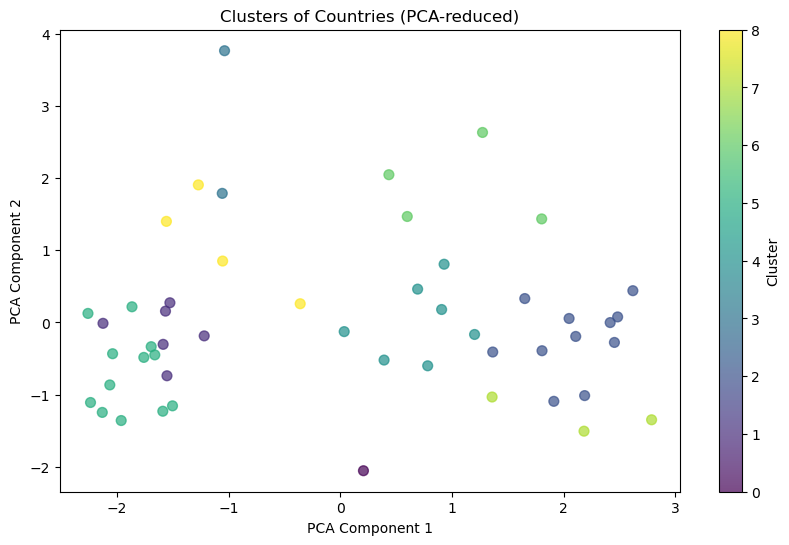

In [70]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions with PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Use the scaled data

# Plotting the clusters with PCA components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Countries (PCA-reduced)')
plt.show()

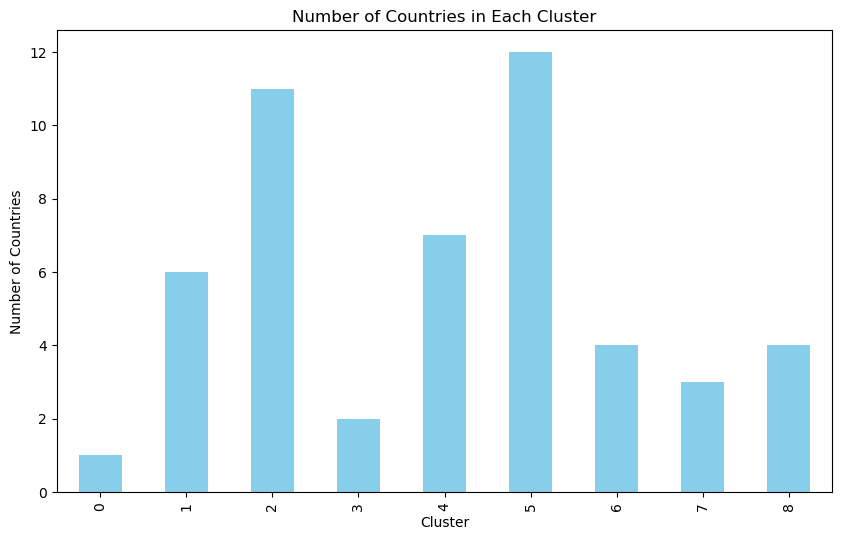

In [71]:
import matplotlib.pyplot as plt

# Count the number of countries in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Cluster')
plt.show()